In [1]:
#import os
#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [28]:
suptitles = {a+topo : a+"-bend, "+{'_2pi':r"$\pi\pi$", '_pi_p':r"$\pi p$"}[topo] for a in 'in out'.split() for topo in '_2pi _pi_p'.split()}

In [3]:
from __future__ import absolute_import, division, print_function
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.experimental.set_memory_growth(physical_devices[1], True)

IndexError: list index out of range

In [35]:
import time
import numpy as np
import pandas as pd
#import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
#from root_pandas import read_root
from matplotlib import rc
from numpy import inf


import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np, math, pylab
#import ROOT
#from ROOT import TFile

#import root_pandas
%matplotlib inline

import uproot

rc('text', usetex=True)

import matplotlib as mpl
#rc('font', family='serif')
#rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

In [36]:
# Global plot settings
from matplotlib import rc
import matplotlib.font_manager

#rc('font', family='serif')
#rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

In [37]:
# Define default plot styles
plot_style_0 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'linestyle': '--',
    'density': True
}

plot_style_1 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'density': True
}

plot_style_2 = {'alpha': 0.5, 'density': True}

In [38]:
# Check Versions
print(tf.__version__)  # 1.15.0
print(tensorflow.keras.__version__)  # 2.2.4

2.3.1
2.4.0


## Obtain datasets and simulations

In [7]:
import root_pandas
import glob
dfs_all = {a: root_pandas.read_root(glob.glob(f"/home/sebouh/tuples_hadd/{a}bend_dihadrons*.root")) for a in 'in out'.split()}
dfs_all.update({'MC_'+a: root_pandas.read_root(glob.glob("../in/mc_test_*b.root"),'dihadrons') for a in 'in out'.split()})

In [8]:
for key in 'in out MC_in MC_out'.split():
    dfs_all[key+'_pi_p'] = dfs_all[key].query('h1_cm_pt>0.3 and h2_cm_pt>0.3'\
        + " and h2_pid == 2212 and mx_eh1x > 1.665 and abs(h1_pid) ==211 and h2_z < 0.5")
    
    dfs_all[key+'_2pi'] = dfs_all[key].query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")
                                    
                                

In [9]:
for df in dfs_all.values(): 
    df['pass_reco'] = np.where(df['h2_cm_pt']>0, 1, 0)
    if 'h2_truth_cm_pt' in df.columns:
        df['pass_truth'] = np.where(df['h2_truth_cm_pt']*df['Q2']>0, 1, 0)
    else:
        df['pass_truth'] = np.where(df['Q2']>0, 1, 0)


#mc_hadron['pass_reco'] = np.where(mc_hadron['h_cm_pt']>0, 1, 0)
#mc_hadron['pass_truth'] = np.where(mc_hadron['h_truth_cm_pt']*mc_hadron['Q2']>0, 1, 0)
#data_hadron['pass_reco'] = np.where(data_hadron['h_cm_pt']>0, 1, 0)

<ipython-input-9-e48fd21cdd51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pass_reco'] = np.where(df['h2_cm_pt']>0, 1, 0)
<ipython-input-9-e48fd21cdd51>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pass_truth'] = np.where(df['Q2']>0, 1, 0)
<ipython-input-9-e48fd21cdd51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [10]:
#patch the things that are zero
for df in dfs_all.values():
    for column in df.columns:
        if "truth" in column and (not "pass" in column) and column != "E":
            df[column] = df[column]*df.pass_truth+(1-df.pass_truth)*-9999
        if not "truth" in column and (not "pass" in column) and column != "E":
            df[column] = df[column]*df.pass_reco+(1-df.pass_reco)*-9999



<ipython-input-10-35bde3757971>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column]*df.pass_reco+(1-df.pass_reco)*-9999
<ipython-input-10-35bde3757971>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column]*df.pass_truth+(1-df.pass_truth)*-9999


In [11]:
dfs_data = {a+topo : dfs_all[a+topo] for a in 'in out'.split() for topo in '_2pi _pi_p'.split()}
dfs_mc = {a+topo : dfs_all['MC_' + a+topo] for a in 'in out'.split() for topo in '_2pi _pi_p'.split()}

## You want reasonable sample of MC,
## Try at minimum e.g x 3 the data size

In [12]:

for key in dfs_data.keys():
    print(key, len(dfs_data[key]), len(dfs_mc[key]), len(dfs_mc[key])*1./len(dfs_data[key]))
    trimlength = int(len(dfs_mc[key])/3)
    dfs_data[key] = dfs_data[key][:trimlength]
#print(len(data))
#print(len(mc.query('pass_reco==1'))) ##only what is really reconstructed counts
#print(len(mc)) ##only what is really reconstructed counts

in_2pi 1419720 299314 0.2108260783816527
in_pi_p 1197931 170638 0.14244393041001527
out_2pi 6123825 299314 0.04887696823472258
out_pi_p 3663752 170638 0.04657465898346831


## Unfold Data

In [13]:
from __future__ import absolute_import, division, print_function
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
# Input multiple observables as tuple or list (i.e. theta0_G = (obs_1, obs_2, ...))





def weighted_binary_crossentropy(y_true, y_pred):
    weights = tf.gather(y_true, [1], axis=1) # event weights
    y_true = tf.gather(y_true, [0], axis=1) # actual y_true for loss
    
    # Clip the prediction value to prevent NaN's and Inf's
    epsilon = K.epsilon()
    y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
    t_loss = -weights * ((y_true) * K.log(y_pred) +
                         (1 - y_true) * K.log(1 - y_pred))
    
    return K.mean(t_loss)
def multifold(num_observables, iterations, theta0_G, theta0_S,
              theta_unknown_S,weights_MC_sim=None,weights_MC_data=None,verbose=1):
    
    if weights_MC_sim is None:
        weights_MC_sim = np.ones(len(theta0_S))
    
    if weights_MC_data is None:
        weights_MC_data = np.ones(len(theta_unknown_S))
    
    
    theta0 = np.stack([theta0_G, theta0_S], axis=1)
    labels0 = np.zeros(len(theta0))
    theta_unknown = np.stack([theta_unknown_S, theta_unknown_S], axis=1)
    labels1 = np.ones(len(theta0_G))
    labels_unknown = np.ones(len(theta_unknown_S))
    
    xvals_1 = np.concatenate((theta0_S, theta_unknown_S))
    yvals_1 = np.concatenate((labels0, labels_unknown))
    xvals_2 = np.concatenate((theta0_G, theta0_G))
    yvals_2 = np.concatenate((labels0, labels1))
    weights = np.empty(shape=(iterations, 2, len(theta0_G)))
    
    inputs = Input((num_observables, ))
    hidden_layer_1 = Dense(50, activation='relu')(inputs)
    hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
    hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
    outputs = Dense(1, activation='sigmoid')(hidden_layer_3)
    model = Model(inputs=inputs, outputs=outputs)
    earlystopping = EarlyStopping(patience=10,
                              verbose=verbose,
                              restore_best_weights=True)
    
    # from NN (DCTR) 
    def reweight(events):
        f = model.predict(events, batch_size=10000)
        weights = f / (1. - f)
        return np.squeeze(np.nan_to_num(weights))
    
    
    
    weights_pull = weights_MC_sim
    weights_push = weights_MC_sim
    
    #weights_pull = np.ones(len(theta0_S))
    #weights_push = np.ones(len(theta0_S))
    
    history = {}
    history['step1'] = []
    history['step2'] = []
    for i in range(iterations):
        print("\nITERATION: {}\n".format(i + 1))
        print("STEP 1\n")
        
        weights_1 = np.concatenate((weights_push,weights_MC_data ))
        
        
      
        X_train_1, X_test_1, Y_train_1, Y_test_1, w_train_1, w_test_1 = train_test_split(
        xvals_1, yvals_1, weights_1)
        
        Y_train_1 = np.stack((Y_train_1, w_train_1), axis=1)
        Y_test_1 = np.stack((Y_test_1, w_test_1), axis=1)
            
            
        batch_size=10000
        model.compile(loss=weighted_binary_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
        
        hist_s1 =  model.fit(X_train_1,
              Y_train_1,
              epochs=200,
              batch_size=batch_size,
              validation_data=(X_test_1, Y_test_1),
              callbacks=[earlystopping],
              verbose=verbose)
        
        history['step1'].append(hist_s1)
        weights_pull = weights_push * reweight(theta0_S)
        weights_pull[theta0_S[:,0]==-10] = 1
        weights[i, :1, :] = weights_pull
        
        print("\nSTEP 2\n")
        weights_2 = np.concatenate((weights_MC_sim, weights_pull))

        #weights_2 = np.concatenate((np.ones(len(theta0_G)), weights_pull))
        # ones for MC Truth (not MC weights), actual weights for (reweighted) MC Truth
        X_train_2, X_test_2, Y_train_2, Y_test_2, w_train_2, w_test_2 = train_test_split(
            xvals_2, yvals_2, weights_2)
    
        # zip ("hide") the weights with the labels
        Y_train_2 = np.stack((Y_train_2, w_train_2), axis=1)
        Y_test_2 = np.stack((Y_test_2, w_test_2), axis=1)
        model.compile(loss=weighted_binary_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
        hist_s2 = model.fit(X_train_2,
              Y_train_2,
              epochs=200,
              batch_size=batch_size,
              validation_data=(X_test_2, Y_test_2),
              callbacks=[earlystopping],
              verbose=verbose)
        
        history['step2'].append(hist_s2)

        #weights_push = reweight(theta0_G)
        weights_push = weights_MC_sim * reweight(theta0_G)

        weights[i, 1:2, :] = weights_push
   
    return weights, model, history

 

In [14]:
help(multifold)

Help on function multifold in module __main__:

multifold(num_observables, iterations, theta0_G, theta0_S, theta_unknown_S, weights_MC_sim=None, weights_MC_data=None, verbose=1)



In [15]:
def run_omnifold(df_data,df_mc, observable_names_reco, observable_names_truth, iterations=4):
    K.clear_session()
    
    num_observables = len(observable_names_reco)
    theta0_G=np.c_[tuple((np.array(df_mc[obs]) for obs in observable_names_truth))]
    theta0_S=np.c_[tuple((np.array(df_mc[obs]) for obs in observable_names_reco))]
    theta_unknown_S=np.c_[tuple((np.array(df_data[obs]) for obs in observable_names_reco))]

    print(len(df_mc))
    print(theta0_S)
    print(len(theta0_G[0]))
    print(len(df_mc))
    pass_reco = np.array(df_mc['pass_reco'])
    pass_truth = np.array(df_mc['pass_truth'])
    theta0_S[:,0][pass_reco==0] = -10
    theta0_G[:,0][pass_truth==0] = -10


    import time,os
    start = time.perf_counter()
    #try:
    weights, model, history = multifold(num_observables=num_observables,
                           iterations=iterations,
                           theta0_G=theta0_G,
                           theta0_S=theta0_S,
                           theta_unknown_S= theta_unknown_S)

    duration = time.perf_counter()-start
    print("total time: ",duration//3600,"hours", (duration//60)%60, "minutes", duration % 60, "seconds")
    os.system('say "your program has finished"')
    
    return weights, model, history
#finally : 
#    duration = time.perf_counter()-start
#    print("total time: ",duration//3600,"hours", (duration//60)%60, "minutes", duration % 60, "seconds")
#    os.system('say "your program has crashed"')

In [19]:
for k in dfs_data.keys():
    print(k, len(dfs_data[k]), len(dfs_mc[k]))
#dfs_data = dict(dfs_data)
#dfs_mc = dict(dfs_mc)

weights = {}
models = {}
histories = {}

variables = 'diff_rap_cm diff_phi_cm h1_z h2_z x Q2 h1_cm_pt h2_cm_pt'.split()

for a in 'in out'.split():
    for topo in '_2pi _pi_p'.split():
        name = a+topo
        #if not name in ('C_2pi', 'C_pi_p', 'D_2pi'):#for now, only do this for the carbon MCs and D_2pi
        #    continue
        weights[name], models[name], histories[name] = run_omnifold(dfs_data[name],dfs_mc[name], variables, variables, iterations=4)
            
        

in_2pi 99771 299314
in_pi_p 56879 170638
out_2pi 99771 299314
out_pi_p 56879 170638
299314
[[ 0.01985088  2.52168892  0.43699868 ...  1.90213179  0.3971499
   0.35396951]
 [ 0.99916985 -3.04230802  0.40478427 ...  1.69477016  0.63887993
   0.31850574]
 [ 0.80036103 -2.32183424  0.53397997 ...  1.02223224  0.51311249
   0.3665312 ]
 ...
 [ 0.95639133  2.22954674  0.4368124  ...  2.48770148  0.38981219
   0.45604169]
 [-0.04039412  2.14073793  0.45246507 ...  2.16667578  0.44038563
   0.38933147]
 [ 0.57070807 -2.73511848  0.42583138 ...  2.12981719  1.04253744
   0.48103799]]
8
299314

ITERATION: 1

STEP 1

Epoch 1/200
30/30 [==============================] - 0s 5ms/step - loss: 0.6064 - accuracy: 0.4016 - val_loss: 0.5586 - val_accuracy: 0.3754
Epoch 2/200
30/30 [==============================] - 0s 4ms/step - loss: 0.5453 - accuracy: 0.3749 - val_loss: 0.5333 - val_accuracy: 0.3754
Epoch 3/200
30/30 [==============================] - 0s 4ms/step - loss: 0.5269 - accuracy: 0.3749 - val

30/30 [==============================] - 0s 3ms/step - loss: 0.4743 - accuracy: 0.4020 - val_loss: 0.4717 - val_accuracy: 0.4006
Epoch 55/200
30/30 [==============================] - 0s 3ms/step - loss: 0.4740 - accuracy: 0.4017 - val_loss: 0.4718 - val_accuracy: 0.4008
Epoch 56/200
30/30 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.4013 - val_loss: 0.4722 - val_accuracy: 0.3955
Epoch 57/200
30/30 [==============================] - 0s 3ms/step - loss: 0.4744 - accuracy: 0.4019 - val_loss: 0.4719 - val_accuracy: 0.4081
Epoch 58/200
30/30 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.4024 - val_loss: 0.4718 - val_accuracy: 0.3972
Epoch 59/200
30/30 [==============================] - 0s 3ms/step - loss: 0.4739 - accuracy: 0.4017 - val_loss: 0.4715 - val_accuracy: 0.4020
Epoch 60/200
30/30 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.4021 - val_loss: 0.4717 - val_accuracy: 0.4051
Epoch 61/200
30/30 

Epoch 112/200
30/30 [==============================] - 0s 3ms/step - loss: 0.4721 - accuracy: 0.4036 - val_loss: 0.4700 - val_accuracy: 0.4046
Epoch 113/200
30/30 [==============================] - 0s 3ms/step - loss: 0.4714 - accuracy: 0.4041 - val_loss: 0.4698 - val_accuracy: 0.4052
Epoch 114/200
30/30 [==============================] - 0s 3ms/step - loss: 0.4715 - accuracy: 0.4041 - val_loss: 0.4699 - val_accuracy: 0.4065
Epoch 115/200
30/30 [==============================] - 0s 3ms/step - loss: 0.4715 - accuracy: 0.4043 - val_loss: 0.4702 - val_accuracy: 0.4121
Epoch 116/200
30/30 [==============================] - 0s 4ms/step - loss: 0.4716 - accuracy: 0.4038 - val_loss: 0.4698 - val_accuracy: 0.4058
Epoch 117/200
30/30 [==============================] - 0s 3ms/step - loss: 0.4713 - accuracy: 0.4044 - val_loss: 0.4697 - val_accuracy: 0.4005
Epoch 118/200
30/30 [==============================] - 0s 3ms/step - loss: 0.4715 - accuracy: 0.4044 - val_loss: 0.4704 - val_accuracy: 0.4088

45/45 [==============================] - 0s 3ms/step - loss: 0.3172 - accuracy: 0.2572 - val_loss: 0.3183 - val_accuracy: 0.2577
Epoch 33/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3172 - accuracy: 0.2571 - val_loss: 0.3183 - val_accuracy: 0.2567
Epoch 34/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3172 - accuracy: 0.2569 - val_loss: 0.3182 - val_accuracy: 0.2572
Epoch 35/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3172 - accuracy: 0.2571 - val_loss: 0.3182 - val_accuracy: 0.2576
Epoch 36/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3173 - accuracy: 0.2571 - val_loss: 0.3183 - val_accuracy: 0.2579
Epoch 37/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3172 - accuracy: 0.2570 - val_loss: 0.3189 - val_accuracy: 0.2581
Epoch 38/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3174 - accuracy: 0.2573 - val_loss: 0.3184 - val_accuracy: 0.2583
Epoch 39/200
45/45 

30/30 [==============================] - 0s 3ms/step - loss: 0.3436 - accuracy: 0.3776 - val_loss: 0.3430 - val_accuracy: 0.3786
Epoch 32/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3435 - accuracy: 0.3753 - val_loss: 0.3431 - val_accuracy: 0.3752
Epoch 33/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3435 - accuracy: 0.3832 - val_loss: 0.3429 - val_accuracy: 0.3789
Epoch 34/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3434 - accuracy: 0.3744 - val_loss: 0.3428 - val_accuracy: 0.3788
Epoch 35/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3434 - accuracy: 0.3797 - val_loss: 0.3430 - val_accuracy: 0.3627
Epoch 36/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3434 - accuracy: 0.3760 - val_loss: 0.3428 - val_accuracy: 0.3737
Epoch 37/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3433 - accuracy: 0.3735 - val_loss: 0.3430 - val_accuracy: 0.3795
Epoch 38/200
30/30 

Epoch 89/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3415 - accuracy: 0.3751 - val_loss: 0.3420 - val_accuracy: 0.3725
Epoch 90/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.3857 - val_loss: 0.3415 - val_accuracy: 0.3717
Epoch 91/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.3790 - val_loss: 0.3413 - val_accuracy: 0.3822
Epoch 92/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3412 - accuracy: 0.3820 - val_loss: 0.3414 - val_accuracy: 0.3716
Epoch 93/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.3826 - val_loss: 0.3413 - val_accuracy: 0.3815
Epoch 94/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.3815 - val_loss: 0.3412 - val_accuracy: 0.3740
Epoch 95/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3410 - accuracy: 0.3826 - val_loss: 0.3414 - val_accuracy: 0.3742
Epoch 

30/30 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.3847 - val_loss: 0.3404 - val_accuracy: 0.3801
Epoch 147/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.3831 - val_loss: 0.3398 - val_accuracy: 0.3704
Epoch 148/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.3824 - val_loss: 0.3404 - val_accuracy: 0.3682
Epoch 149/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3393 - accuracy: 0.3824 - val_loss: 0.3401 - val_accuracy: 0.3787
Epoch 150/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3391 - accuracy: 0.3830 - val_loss: 0.3401 - val_accuracy: 0.3694
Epoch 151/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.3821 - val_loss: 0.3397 - val_accuracy: 0.3860
Epoch 152/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3390 - accuracy: 0.3853 - val_loss: 0.3401 - val_accuracy: 0.3739
Epoch 153/200

45/45 [==============================] - 0s 3ms/step - loss: 0.3218 - accuracy: 0.2559 - val_loss: 0.3200 - val_accuracy: 0.2551
Epoch 4/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3195 - accuracy: 0.2559 - val_loss: 0.3189 - val_accuracy: 0.2546
Epoch 5/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3180 - accuracy: 0.2558 - val_loss: 0.3176 - val_accuracy: 0.2553
Epoch 6/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3168 - accuracy: 0.2558 - val_loss: 0.3164 - val_accuracy: 0.2556
Epoch 7/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3161 - accuracy: 0.2558 - val_loss: 0.3159 - val_accuracy: 0.2556
Epoch 8/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3157 - accuracy: 0.2560 - val_loss: 0.3156 - val_accuracy: 0.2548
Epoch 9/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.2561 - val_loss: 0.3154 - val_accuracy: 0.2551
Epoch 10/200
45/45 [=====

30/30 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.3740 - val_loss: 0.3474 - val_accuracy: 0.3730
Epoch 18/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.3724 - val_loss: 0.3473 - val_accuracy: 0.3699
Epoch 19/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3464 - accuracy: 0.3682 - val_loss: 0.3474 - val_accuracy: 0.3748
Epoch 20/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3464 - accuracy: 0.3689 - val_loss: 0.3474 - val_accuracy: 0.3774
Epoch 21/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.3723 - val_loss: 0.3474 - val_accuracy: 0.3735
Epoch 22/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3464 - accuracy: 0.3688 - val_loss: 0.3473 - val_accuracy: 0.3706
Epoch 23/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3463 - accuracy: 0.3690 - val_loss: 0.3473 - val_accuracy: 0.3681
Epoch 24/200
30/30 

45/45 [==============================] - 0s 3ms/step - loss: 0.3129 - accuracy: 0.2577 - val_loss: 0.3146 - val_accuracy: 0.2560
Epoch 28/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3130 - accuracy: 0.2577 - val_loss: 0.3147 - val_accuracy: 0.2571
Epoch 00028: early stopping

ITERATION: 4

STEP 1

Epoch 1/200
30/30 [==============================] - 0s 5ms/step - loss: 0.3560 - accuracy: 0.3902 - val_loss: 0.3459 - val_accuracy: 0.3612
Epoch 2/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3471 - accuracy: 0.3627 - val_loss: 0.3451 - val_accuracy: 0.3738
Epoch 3/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.3688 - val_loss: 0.3449 - val_accuracy: 0.3658
Epoch 4/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3463 - accuracy: 0.3588 - val_loss: 0.3447 - val_accuracy: 0.3590
Epoch 5/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 0.3504 - val_loss: 0.3

45/45 [==============================] - 0s 4ms/step - loss: 0.3376 - accuracy: 0.2542 - val_loss: 0.3238 - val_accuracy: 0.2535
Epoch 2/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3224 - accuracy: 0.2550 - val_loss: 0.3202 - val_accuracy: 0.2573
Epoch 3/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3203 - accuracy: 0.2580 - val_loss: 0.3197 - val_accuracy: 0.2574
Epoch 4/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3196 - accuracy: 0.2580 - val_loss: 0.3191 - val_accuracy: 0.2597
Epoch 5/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3190 - accuracy: 0.2585 - val_loss: 0.3187 - val_accuracy: 0.2595
Epoch 6/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3185 - accuracy: 0.2586 - val_loss: 0.3191 - val_accuracy: 0.2599
Epoch 7/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3181 - accuracy: 0.2584 - val_loss: 0.3184 - val_accuracy: 0.2593
Epoch 8/200
45/45 [======

18/18 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.3868 - val_loss: 0.4833 - val_accuracy: 0.3934
Epoch 23/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4848 - accuracy: 0.3880 - val_loss: 0.4826 - val_accuracy: 0.3893
Epoch 24/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4841 - accuracy: 0.3888 - val_loss: 0.4830 - val_accuracy: 0.3976
Epoch 25/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.3893 - val_loss: 0.4832 - val_accuracy: 0.4012
Epoch 26/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4841 - accuracy: 0.3898 - val_loss: 0.4821 - val_accuracy: 0.3892
Epoch 27/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4840 - accuracy: 0.3889 - val_loss: 0.4818 - val_accuracy: 0.3863
Epoch 28/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4834 - accuracy: 0.3898 - val_loss: 0.4821 - val_accuracy: 0.3910
Epoch 29/200
18/18 

Epoch 80/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4794 - accuracy: 0.4007 - val_loss: 0.4782 - val_accuracy: 0.4062
Epoch 81/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4793 - accuracy: 0.4015 - val_loss: 0.4781 - val_accuracy: 0.4084
Epoch 82/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4792 - accuracy: 0.4009 - val_loss: 0.4782 - val_accuracy: 0.3952
Epoch 83/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4793 - accuracy: 0.4013 - val_loss: 0.4778 - val_accuracy: 0.4089
Epoch 84/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.4029 - val_loss: 0.4778 - val_accuracy: 0.4003
Epoch 85/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.4025 - val_loss: 0.4785 - val_accuracy: 0.3953
Epoch 86/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4793 - accuracy: 0.4026 - val_loss: 0.4777 - val_accuracy: 0.4086
Epoch 

18/18 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.4064 - val_loss: 0.4752 - val_accuracy: 0.4097
Epoch 138/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4756 - accuracy: 0.4078 - val_loss: 0.4752 - val_accuracy: 0.3988
Epoch 139/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4757 - accuracy: 0.4050 - val_loss: 0.4758 - val_accuracy: 0.4146
Epoch 140/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.4065 - val_loss: 0.4747 - val_accuracy: 0.4056
Epoch 141/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.4071 - val_loss: 0.4759 - val_accuracy: 0.4131
Epoch 142/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.4087 - val_loss: 0.4748 - val_accuracy: 0.4035
Epoch 143/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.4054 - val_loss: 0.4747 - val_accuracy: 0.4151
Epoch 144/200

18/18 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.4140 - val_loss: 0.4724 - val_accuracy: 0.4041
Epoch 195/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4725 - accuracy: 0.4093 - val_loss: 0.4728 - val_accuracy: 0.4191
Epoch 196/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4723 - accuracy: 0.4109 - val_loss: 0.4723 - val_accuracy: 0.4165
Epoch 197/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4720 - accuracy: 0.4119 - val_loss: 0.4721 - val_accuracy: 0.4077
Epoch 198/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4721 - accuracy: 0.4112 - val_loss: 0.4729 - val_accuracy: 0.4051
Epoch 199/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4726 - accuracy: 0.4102 - val_loss: 0.4756 - val_accuracy: 0.4288
Epoch 200/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4729 - accuracy: 0.4129 - val_loss: 0.4728 - val_accuracy: 0.4141

STEP 2

Epoc

Epoch 52/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3153 - accuracy: 0.2590 - val_loss: 0.3159 - val_accuracy: 0.2636
Epoch 53/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.2588 - val_loss: 0.3156 - val_accuracy: 0.2624
Epoch 54/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3155 - accuracy: 0.2592 - val_loss: 0.3155 - val_accuracy: 0.2575
Epoch 55/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3151 - accuracy: 0.2589 - val_loss: 0.3151 - val_accuracy: 0.2578
Epoch 56/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.2587 - val_loss: 0.3152 - val_accuracy: 0.2580
Epoch 57/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3151 - accuracy: 0.2589 - val_loss: 0.3163 - val_accuracy: 0.2547
Epoch 58/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.2589 - val_loss: 0.3151 - val_accuracy: 0.2571
Epoch 

18/18 [==============================] - 0s 3ms/step - loss: 0.3383 - accuracy: 0.3577 - val_loss: 0.3369 - val_accuracy: 0.3639
Epoch 44/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3386 - accuracy: 0.3614 - val_loss: 0.3383 - val_accuracy: 0.3563
Epoch 45/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3384 - accuracy: 0.3572 - val_loss: 0.3374 - val_accuracy: 0.3560
Epoch 46/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3382 - accuracy: 0.3671 - val_loss: 0.3368 - val_accuracy: 0.3612
Epoch 47/200
18/18 [==============================] - 0s 4ms/step - loss: 0.3382 - accuracy: 0.3657 - val_loss: 0.3368 - val_accuracy: 0.3690
Epoch 48/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3382 - accuracy: 0.3610 - val_loss: 0.3371 - val_accuracy: 0.3583
Epoch 49/200
18/18 [==============================] - 0s 4ms/step - loss: 0.3381 - accuracy: 0.3681 - val_loss: 0.3388 - val_accuracy: 0.3496
Epoch 50/200
18/18 

18/18 [==============================] - 0s 3ms/step - loss: 0.3403 - accuracy: 0.3455 - val_loss: 0.3391 - val_accuracy: 0.3594
Epoch 17/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3405 - accuracy: 0.3480 - val_loss: 0.3390 - val_accuracy: 0.3494
Epoch 18/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3405 - accuracy: 0.3457 - val_loss: 0.3395 - val_accuracy: 0.3251
Epoch 19/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3408 - accuracy: 0.3418 - val_loss: 0.3394 - val_accuracy: 0.3326
Epoch 20/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3405 - accuracy: 0.3495 - val_loss: 0.3392 - val_accuracy: 0.3278
Epoch 21/200
18/18 [==============================] - 0s 4ms/step - loss: 0.3402 - accuracy: 0.3414 - val_loss: 0.3388 - val_accuracy: 0.3484
Epoch 22/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3403 - accuracy: 0.3492 - val_loss: 0.3391 - val_accuracy: 0.3476
Epoch 23/200
18/18 

26/26 [==============================] - 0s 3ms/step - loss: 0.3058 - accuracy: 0.2578 - val_loss: 0.3068 - val_accuracy: 0.2559
Epoch 12/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3057 - accuracy: 0.2579 - val_loss: 0.3062 - val_accuracy: 0.2572
Epoch 13/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3057 - accuracy: 0.2577 - val_loss: 0.3060 - val_accuracy: 0.2563
Epoch 14/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3056 - accuracy: 0.2578 - val_loss: 0.3060 - val_accuracy: 0.2588
Epoch 15/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3056 - accuracy: 0.2580 - val_loss: 0.3062 - val_accuracy: 0.2600
Epoch 16/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3055 - accuracy: 0.2577 - val_loss: 0.3061 - val_accuracy: 0.2583
Epoch 17/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3058 - accuracy: 0.2581 - val_loss: 0.3060 - val_accuracy: 0.2577
Epoch 18/200
26/26 

26/26 [==============================] - 0s 3ms/step - loss: 0.3138 - accuracy: 0.2595 - val_loss: 0.3144 - val_accuracy: 0.2588
Epoch 15/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.2600 - val_loss: 0.3144 - val_accuracy: 0.2596
Epoch 16/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3137 - accuracy: 0.2601 - val_loss: 0.3146 - val_accuracy: 0.2573
Epoch 17/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.2595 - val_loss: 0.3148 - val_accuracy: 0.2621
Epoch 18/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.2601 - val_loss: 0.3145 - val_accuracy: 0.2597
Epoch 19/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3140 - accuracy: 0.2605 - val_loss: 0.3160 - val_accuracy: 0.2579
Epoch 20/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3141 - accuracy: 0.2593 - val_loss: 0.3144 - val_accuracy: 0.2586
Epoch 21/200
26/26 

30/30 [==============================] - 0s 3ms/step - loss: 0.5359 - accuracy: 0.3945 - val_loss: 0.5386 - val_accuracy: 0.3948
Epoch 42/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5356 - accuracy: 0.3948 - val_loss: 0.5389 - val_accuracy: 0.3922
Epoch 43/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5355 - accuracy: 0.3947 - val_loss: 0.5384 - val_accuracy: 0.3925
Epoch 44/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5361 - accuracy: 0.3943 - val_loss: 0.5386 - val_accuracy: 0.3923
Epoch 45/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5356 - accuracy: 0.3947 - val_loss: 0.5392 - val_accuracy: 0.3903
Epoch 46/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5354 - accuracy: 0.3944 - val_loss: 0.5388 - val_accuracy: 0.3973
Epoch 47/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5352 - accuracy: 0.3947 - val_loss: 0.5384 - val_accuracy: 0.3941
Epoch 48/200
30/30 

Epoch 99/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5328 - accuracy: 0.3955 - val_loss: 0.5367 - val_accuracy: 0.3969
Epoch 100/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5326 - accuracy: 0.3956 - val_loss: 0.5364 - val_accuracy: 0.3960
Epoch 101/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5324 - accuracy: 0.3957 - val_loss: 0.5366 - val_accuracy: 0.3934
Epoch 102/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5324 - accuracy: 0.3954 - val_loss: 0.5363 - val_accuracy: 0.3937
Epoch 103/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5325 - accuracy: 0.3957 - val_loss: 0.5361 - val_accuracy: 0.3949
Epoch 104/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5322 - accuracy: 0.3958 - val_loss: 0.5364 - val_accuracy: 0.3968
Epoch 105/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5324 - accuracy: 0.3959 - val_loss: 0.5361 - val_accuracy: 0.3949


30/30 [==============================] - 0s 3ms/step - loss: 0.5304 - accuracy: 0.3969 - val_loss: 0.5349 - val_accuracy: 0.3963
Epoch 157/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5302 - accuracy: 0.3969 - val_loss: 0.5349 - val_accuracy: 0.3957
Epoch 158/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.3966 - val_loss: 0.5350 - val_accuracy: 0.3997
Epoch 159/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5302 - accuracy: 0.3970 - val_loss: 0.5344 - val_accuracy: 0.3966
Epoch 160/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5301 - accuracy: 0.3968 - val_loss: 0.5347 - val_accuracy: 0.3978
Epoch 161/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.3970 - val_loss: 0.5349 - val_accuracy: 0.3940
Epoch 162/200
30/30 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.3968 - val_loss: 0.5345 - val_accuracy: 0.3973
Epoch 163/200

45/45 [==============================] - 0s 3ms/step - loss: 0.3460 - accuracy: 0.2527 - val_loss: 0.3461 - val_accuracy: 0.2524
Epoch 14/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3460 - accuracy: 0.2526 - val_loss: 0.3460 - val_accuracy: 0.2526
Epoch 15/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3460 - accuracy: 0.2526 - val_loss: 0.3461 - val_accuracy: 0.2522
Epoch 16/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3459 - accuracy: 0.2526 - val_loss: 0.3461 - val_accuracy: 0.2521
Epoch 17/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3460 - accuracy: 0.2526 - val_loss: 0.3460 - val_accuracy: 0.2519
Epoch 18/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3459 - accuracy: 0.2526 - val_loss: 0.3462 - val_accuracy: 0.2526
Epoch 19/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3460 - accuracy: 0.2526 - val_loss: 0.3464 - val_accuracy: 0.2522
Epoch 20/200
45/45 

45/45 [==============================] - 0s 3ms/step - loss: 0.3526 - accuracy: 0.2530 - val_loss: 0.3528 - val_accuracy: 0.2526
Epoch 12/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3526 - accuracy: 0.2531 - val_loss: 0.3526 - val_accuracy: 0.2521
Epoch 13/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3524 - accuracy: 0.2530 - val_loss: 0.3525 - val_accuracy: 0.2520
Epoch 14/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3524 - accuracy: 0.2530 - val_loss: 0.3526 - val_accuracy: 0.2518
Epoch 15/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3524 - accuracy: 0.2530 - val_loss: 0.3528 - val_accuracy: 0.2525
Epoch 16/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3524 - accuracy: 0.2530 - val_loss: 0.3527 - val_accuracy: 0.2524
Epoch 17/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3525 - accuracy: 0.2531 - val_loss: 0.3533 - val_accuracy: 0.2512
Epoch 18/200
45/45 

45/45 [==============================] - 0s 3ms/step - loss: 0.3538 - accuracy: 0.2532 - val_loss: 0.3543 - val_accuracy: 0.2524
Epoch 17/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3539 - accuracy: 0.2532 - val_loss: 0.3544 - val_accuracy: 0.2520
Epoch 18/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3539 - accuracy: 0.2532 - val_loss: 0.3544 - val_accuracy: 0.2522
Epoch 19/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3539 - accuracy: 0.2531 - val_loss: 0.3543 - val_accuracy: 0.2527
Epoch 20/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3538 - accuracy: 0.2533 - val_loss: 0.3544 - val_accuracy: 0.2519
Epoch 00020: early stopping

ITERATION: 4

STEP 1

Epoch 1/200
30/30 [==============================] - 0s 5ms/step - loss: 0.3612 - accuracy: 0.3569 - val_loss: 0.3481 - val_accuracy: 0.3271
Epoch 2/200
30/30 [==============================] - 0s 3ms/step - loss: 0.3488 - accuracy: 0.3425 - val_loss: 

45/45 [==============================] - 0s 3ms/step - loss: 0.3518 - accuracy: 0.2525 - val_loss: 0.3521 - val_accuracy: 0.2554
Epoch 7/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3517 - accuracy: 0.2525 - val_loss: 0.3516 - val_accuracy: 0.2543
Epoch 8/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3516 - accuracy: 0.2525 - val_loss: 0.3514 - val_accuracy: 0.2541
Epoch 9/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3513 - accuracy: 0.2525 - val_loss: 0.3513 - val_accuracy: 0.2538
Epoch 10/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3512 - accuracy: 0.2525 - val_loss: 0.3513 - val_accuracy: 0.2539
Epoch 11/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3512 - accuracy: 0.2526 - val_loss: 0.3512 - val_accuracy: 0.2540
Epoch 12/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3511 - accuracy: 0.2525 - val_loss: 0.3513 - val_accuracy: 0.2542
Epoch 13/200
45/45 [==

18/18 [==============================] - 0s 3ms/step - loss: 0.5410 - accuracy: 0.3748 - val_loss: 0.5399 - val_accuracy: 0.3757
Epoch 38/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5408 - accuracy: 0.3748 - val_loss: 0.5392 - val_accuracy: 0.3756
Epoch 39/200
18/18 [==============================] - 0s 4ms/step - loss: 0.5403 - accuracy: 0.3748 - val_loss: 0.5393 - val_accuracy: 0.3756
Epoch 40/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5403 - accuracy: 0.3748 - val_loss: 0.5390 - val_accuracy: 0.3756
Epoch 41/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5402 - accuracy: 0.3748 - val_loss: 0.5388 - val_accuracy: 0.3756
Epoch 42/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5398 - accuracy: 0.3748 - val_loss: 0.5385 - val_accuracy: 0.3756
Epoch 43/200
18/18 [==============================] - 0s 4ms/step - loss: 0.5397 - accuracy: 0.3748 - val_loss: 0.5421 - val_accuracy: 0.3757
Epoch 44/200
18/18 

26/26 [==============================] - 0s 3ms/step - loss: 0.3601 - accuracy: 0.2499 - val_loss: 0.3605 - val_accuracy: 0.2502
Epoch 39/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3600 - accuracy: 0.2499 - val_loss: 0.3606 - val_accuracy: 0.2502
Epoch 40/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3600 - accuracy: 0.2499 - val_loss: 0.3607 - val_accuracy: 0.2502
Epoch 41/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3600 - accuracy: 0.2499 - val_loss: 0.3609 - val_accuracy: 0.2502
Epoch 42/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3599 - accuracy: 0.2499 - val_loss: 0.3606 - val_accuracy: 0.2502
Epoch 43/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3599 - accuracy: 0.2499 - val_loss: 0.3605 - val_accuracy: 0.2502
Epoch 44/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3599 - accuracy: 0.2499 - val_loss: 0.3607 - val_accuracy: 0.2502
Epoch 45/200
26/26 

18/18 [==============================] - 0s 4ms/step - loss: 0.3431 - accuracy: 0.3395 - val_loss: 0.3434 - val_accuracy: 0.3293
Epoch 39/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.3369 - val_loss: 0.3430 - val_accuracy: 0.3528
Epoch 40/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3429 - accuracy: 0.3389 - val_loss: 0.3432 - val_accuracy: 0.3761
Epoch 41/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3430 - accuracy: 0.3480 - val_loss: 0.3430 - val_accuracy: 0.3599
Epoch 42/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3429 - accuracy: 0.3390 - val_loss: 0.3428 - val_accuracy: 0.3418
Epoch 43/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3428 - accuracy: 0.3406 - val_loss: 0.3429 - val_accuracy: 0.3268
Epoch 44/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3428 - accuracy: 0.3415 - val_loss: 0.3429 - val_accuracy: 0.3216
Epoch 45/200
18/18 

Epoch 00095: early stopping

STEP 2

Epoch 1/200
26/26 [==============================] - 0s 5ms/step - loss: 0.3828 - accuracy: 0.2568 - val_loss: 0.3641 - val_accuracy: 0.2503
Epoch 2/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3620 - accuracy: 0.2499 - val_loss: 0.3594 - val_accuracy: 0.2503
Epoch 3/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3590 - accuracy: 0.2499 - val_loss: 0.3581 - val_accuracy: 0.2503
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3581 - accuracy: 0.2499 - val_loss: 0.3578 - val_accuracy: 0.2503
Epoch 5/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3577 - accuracy: 0.2499 - val_loss: 0.3575 - val_accuracy: 0.2503
Epoch 6/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3576 - accuracy: 0.2499 - val_loss: 0.3575 - val_accuracy: 0.2503
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3575 - accuracy: 0.2499 - val_loss: 0.3574

18/18 [==============================] - 0s 3ms/step - loss: 0.3450 - accuracy: 0.3380 - val_loss: 0.3437 - val_accuracy: 0.3236
Epoch 32/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3450 - accuracy: 0.3358 - val_loss: 0.3437 - val_accuracy: 0.3315
Epoch 33/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3450 - accuracy: 0.3392 - val_loss: 0.3437 - val_accuracy: 0.3348
Epoch 34/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3451 - accuracy: 0.3318 - val_loss: 0.3436 - val_accuracy: 0.3444
Epoch 35/200
18/18 [==============================] - 0s 4ms/step - loss: 0.3450 - accuracy: 0.3412 - val_loss: 0.3437 - val_accuracy: 0.3411
Epoch 36/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3450 - accuracy: 0.3376 - val_loss: 0.3436 - val_accuracy: 0.3325
Epoch 37/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3448 - accuracy: 0.3423 - val_loss: 0.3441 - val_accuracy: 0.2935
Epoch 38/200
18/18 

26/26 [==============================] - 0s 3ms/step - loss: 0.3552 - accuracy: 0.2512 - val_loss: 0.3557 - val_accuracy: 0.2521
Epoch 14/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3552 - accuracy: 0.2513 - val_loss: 0.3563 - val_accuracy: 0.2510
Epoch 15/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3553 - accuracy: 0.2511 - val_loss: 0.3557 - val_accuracy: 0.2521
Epoch 16/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3550 - accuracy: 0.2512 - val_loss: 0.3562 - val_accuracy: 0.2524
Epoch 17/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3556 - accuracy: 0.2513 - val_loss: 0.3562 - val_accuracy: 0.2508
Epoch 18/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3552 - accuracy: 0.2511 - val_loss: 0.3557 - val_accuracy: 0.2508
Epoch 19/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3550 - accuracy: 0.2512 - val_loss: 0.3556 - val_accuracy: 0.2519
Epoch 20/200
26/26 

18/18 [==============================] - 0s 3ms/step - loss: 0.3463 - accuracy: 0.3529 - val_loss: 0.3469 - val_accuracy: 0.3452
Epoch 32/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3462 - accuracy: 0.3411 - val_loss: 0.3470 - val_accuracy: 0.3677
Epoch 33/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3462 - accuracy: 0.3624 - val_loss: 0.3470 - val_accuracy: 0.3440
Epoch 34/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3462 - accuracy: 0.3476 - val_loss: 0.3469 - val_accuracy: 0.3584
Epoch 35/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 0.3528 - val_loss: 0.3469 - val_accuracy: 0.3557
Epoch 36/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 0.3539 - val_loss: 0.3469 - val_accuracy: 0.3656
Epoch 37/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 0.3479 - val_loss: 0.3470 - val_accuracy: 0.3582
Epoch 38/200
18/18 

Epoch 89/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3454 - accuracy: 0.3393 - val_loss: 0.3460 - val_accuracy: 0.3176
Epoch 90/200
18/18 [==============================] - 0s 4ms/step - loss: 0.3450 - accuracy: 0.3402 - val_loss: 0.3464 - val_accuracy: 0.3407
Epoch 91/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3450 - accuracy: 0.3474 - val_loss: 0.3462 - val_accuracy: 0.3673
Epoch 92/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3448 - accuracy: 0.3508 - val_loss: 0.3458 - val_accuracy: 0.3539
Epoch 93/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3447 - accuracy: 0.3521 - val_loss: 0.3457 - val_accuracy: 0.3376
Epoch 94/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3447 - accuracy: 0.3467 - val_loss: 0.3459 - val_accuracy: 0.3110
Epoch 95/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3450 - accuracy: 0.3389 - val_loss: 0.3460 - val_accuracy: 0.3244
Epoch 

26/26 [==============================] - 0s 3ms/step - loss: 0.3545 - accuracy: 0.2523 - val_loss: 0.3550 - val_accuracy: 0.2520
Epoch 23/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3545 - accuracy: 0.2525 - val_loss: 0.3553 - val_accuracy: 0.2532
Epoch 24/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3544 - accuracy: 0.2524 - val_loss: 0.3555 - val_accuracy: 0.2513
Epoch 25/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3546 - accuracy: 0.2524 - val_loss: 0.3552 - val_accuracy: 0.2530
Epoch 26/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3544 - accuracy: 0.2525 - val_loss: 0.3552 - val_accuracy: 0.2521
Epoch 27/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3543 - accuracy: 0.2524 - val_loss: 0.3550 - val_accuracy: 0.2523
Epoch 28/200
26/26 [==============================] - 0s 3ms/step - loss: 0.3543 - accuracy: 0.2524 - val_loss: 0.3552 - val_accuracy: 0.2531
Epoch 29/200
26/26 

In [21]:
#print(dfs_mc['in_2pi'].columns)
#weights   

In [22]:
#list all data in history
# summarize history for accuracy

def make_history_plots(key):
    history = histories[key]
    for i in range(4):
        fig,ax = plt.subplots(1,2,figsize=(16,6))
        ax[0].set_title('Step 1: \nreweight sim. from data')
        ax[0].set_xlabel('epoch number')
        ax[0].plot(history['step1'][i].history['loss'][1:],'o',label='Step 1 train loss')
        ax[0].plot(history['step1'][i].history['val_loss'][1:],'o',label='Step 1 test loss')
        ax[0].legend()

        #ax[1].set_title('model accuracy')
        #ax[1].plot(history['step1'][i].history['accuracy'][1:],'o',label='Step 1 train')
        #ax[1].plot(history['step1'][i].history['val_accuracy'][1:],'o',label='Step 1 test')
        #ax[1].legend()
        #ax[1].set_xlabel('epoch number')

        ax[1].set_title('Step 2: \nreweight gen. from sim.')
        ax[1].set_xlabel('epoch number')
        ax[1].plot(history['step2'][i].history['loss'][1:],'o',label='Step 2 train loss')
        ax[1].plot(history['step2'][i].history['val_loss'][1:],'o',label='Step 2 test loss')
        ax[1].legend()

        #ax[3].set_title('model accuracy')
        #ax[3].plot(history['step2'][i].history['accuracy'][1:],'o',label='Step 2 train')
        #ax[3].plot(history['step2'][i].history['val_accuracy'][1:],'o',label='Step 2 test')
        #ax[3].legend()
        #ax[3].set_xlabel('epoch number')

        #for a in ax:
        #    a.set_ylim(0)
        plt.savefig(f"../images/reweight_history_iter_{i}_{key}.png",bbox_inches='tight')

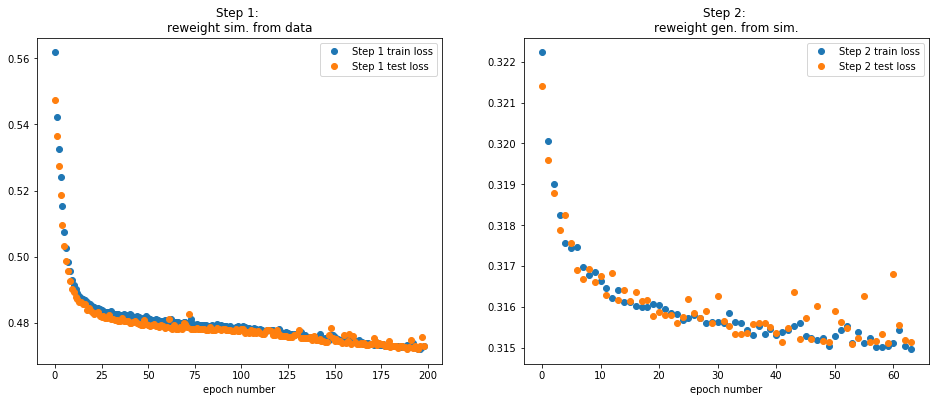

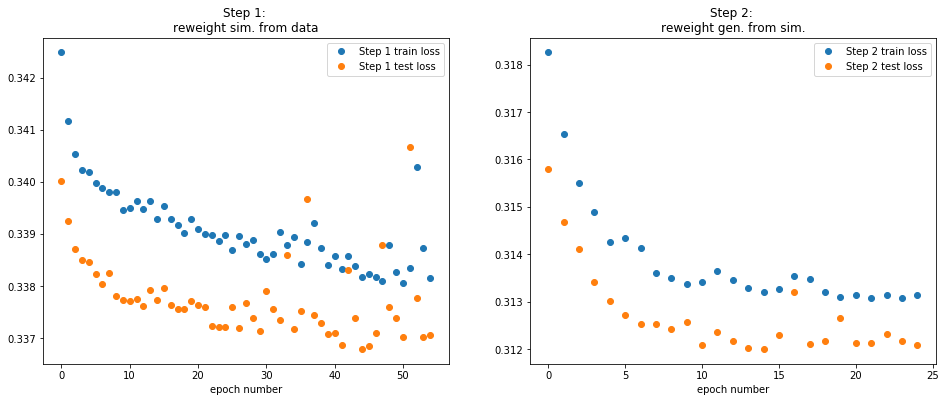

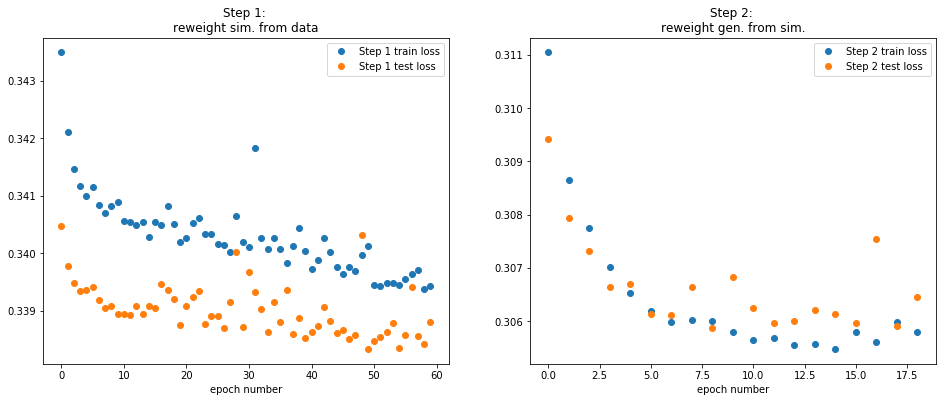

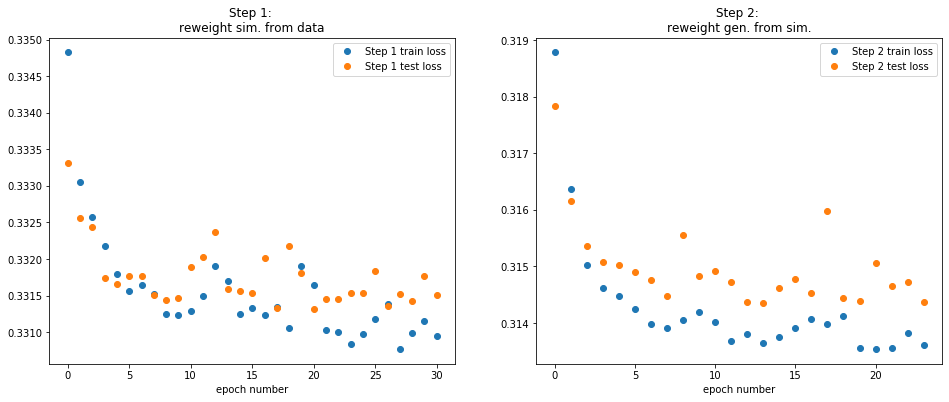

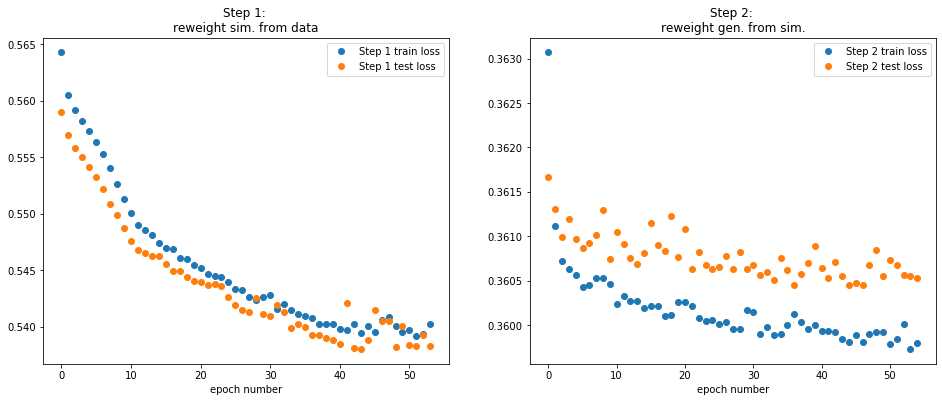

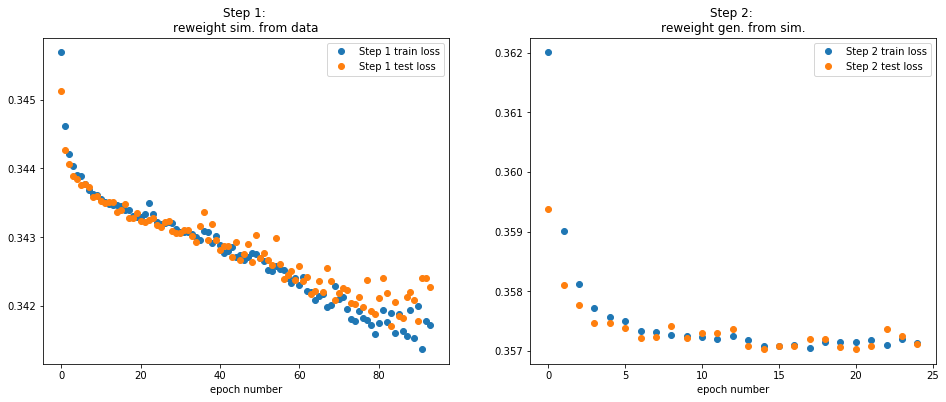

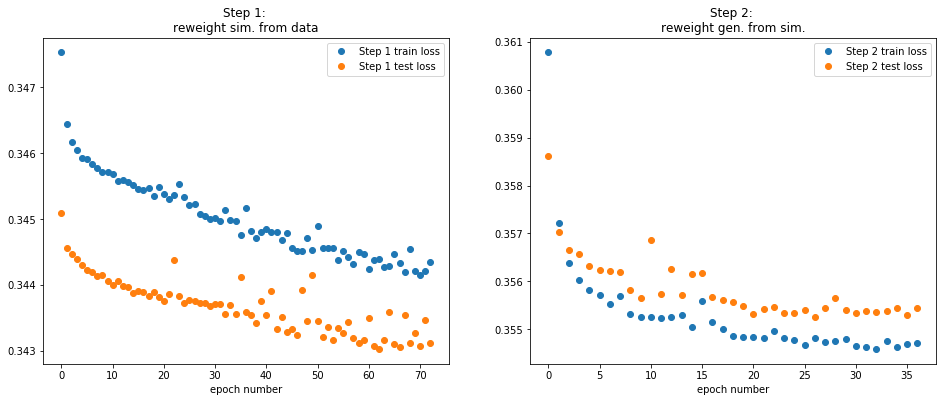

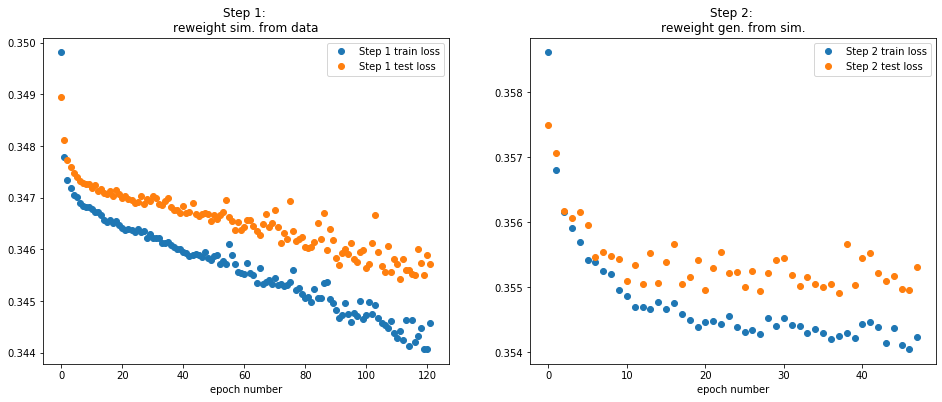

In [23]:
make_history_plots('in_pi_p')
make_history_plots('out_pi_p')

## Plot data and MC reweighted

In [24]:
## This is what in Ben's notebook. 
## The _S is RECO level. 
## You require that the RECO dataframe has a valid pass reco.
## The G is the truth level
## You required that the truth level has pass_truth valid.

In [39]:
#


def reweight_summary_plots(setname, lastIterOnly= True):
    df_data = dfs_data[setname]
    df_mc = dfs_mc[setname]
    for i in range(len(weights[setname])):
        if lastIterOnly and i != len(weights[setname])-1:
            continue
        pass_reco = df_mc.pass_reco != 0
        print(len(pass_reco))
        print("ITERATION: {}".format(i + 1))
        for df in df_data, df_mc:
            if not 'diff_phi_lab' in df.columns:
                df.eval('diff_phi_lab = (h1_ph-h2_ph)',inplace=True)
                df['diff_phi_lab'] = df.diff_phi_lab+(df.diff_phi_lab>np.pi)*-np.pi*2+(df.diff_phi_lab<-np.pi)*np.pi*2
        fig, ax = plt.subplots(3,
                               3,
                               figsize=(16, 16),
                               constrained_layout=True)
        fig.suptitle(suptitles[setname] + f", iter. {i}")

        bins = [[np.linspace(0.0, 4.2, 40), np.linspace(0, 0.6, 50), np.linspace(-np.pi, np.pi, 50)],
               [np.linspace(0, 1, 50), np.linspace(0, 1.5, 50), np.linspace(-np.pi, np.pi, 50)],
               [np.linspace(0, 1, 50), np.linspace(0, 1.5, 50), np.linspace(-.5, 3, 50)]]
        xlabels = [[r'$Q^{2}$ [GeV$^2$]', r'$x$', r'$\Delta\phi_{\mathrm{lab}}$ [rad]'],
                  [r'$z_1$', r'$p^1_T$ [GeV]', r'$\Delta\phi_{\mathrm{cm}}$ [rad]'],
                  [r'$z_2$', r'$p^2_T$ [GeV]', r'$\Delta y_{\mathrm{cm}}$']]
        xvars = [['Q2', 'x', 'diff_phi_lab'],
                ['h1_z', 'h1_cm_pt','diff_phi_cm'],
                ['h2_z', 'h2_cm_pt','diff_rap_cm']]

        for row in range(3):
            for col in range(3):

                ax[row,col].set_xlabel(xlabels[row][col])
                ax[row,col].set_ylabel('Events per bin (Normalized)')
                ax[row,col].hist(df_mc[xvars[row][col]][pass_reco], bins=bins[row][col], label=r'MC .', **plot_style_2)
                #print(len(weights), len(weights[i,0,:]), len(pass_reco),len(df_data))

                ax[row,col].hist(df_mc[xvars[row][col]][pass_reco],
                           bins=bins[row][col],
                           weights=weights[setname][i, 0, :][pass_reco],
                           label=r'MC . DCTR wgt.',
                           **plot_style_1)

                ax[row,col].hist(df_data[xvars[row][col]],
                           bins=bins[row][col],
                           label=r'Data (reco)',
                           **plot_style_2)
                if row == 0 and col == 0:
                    ax[row,col].legend(frameon=False,loc='best')


        fig.savefig(f"../images/reweight_summary_{setname}_iter{i}.png",bbox_inches='tight')

299314
ITERATION: 4
170638
ITERATION: 4
299314
ITERATION: 4
170638
ITERATION: 4


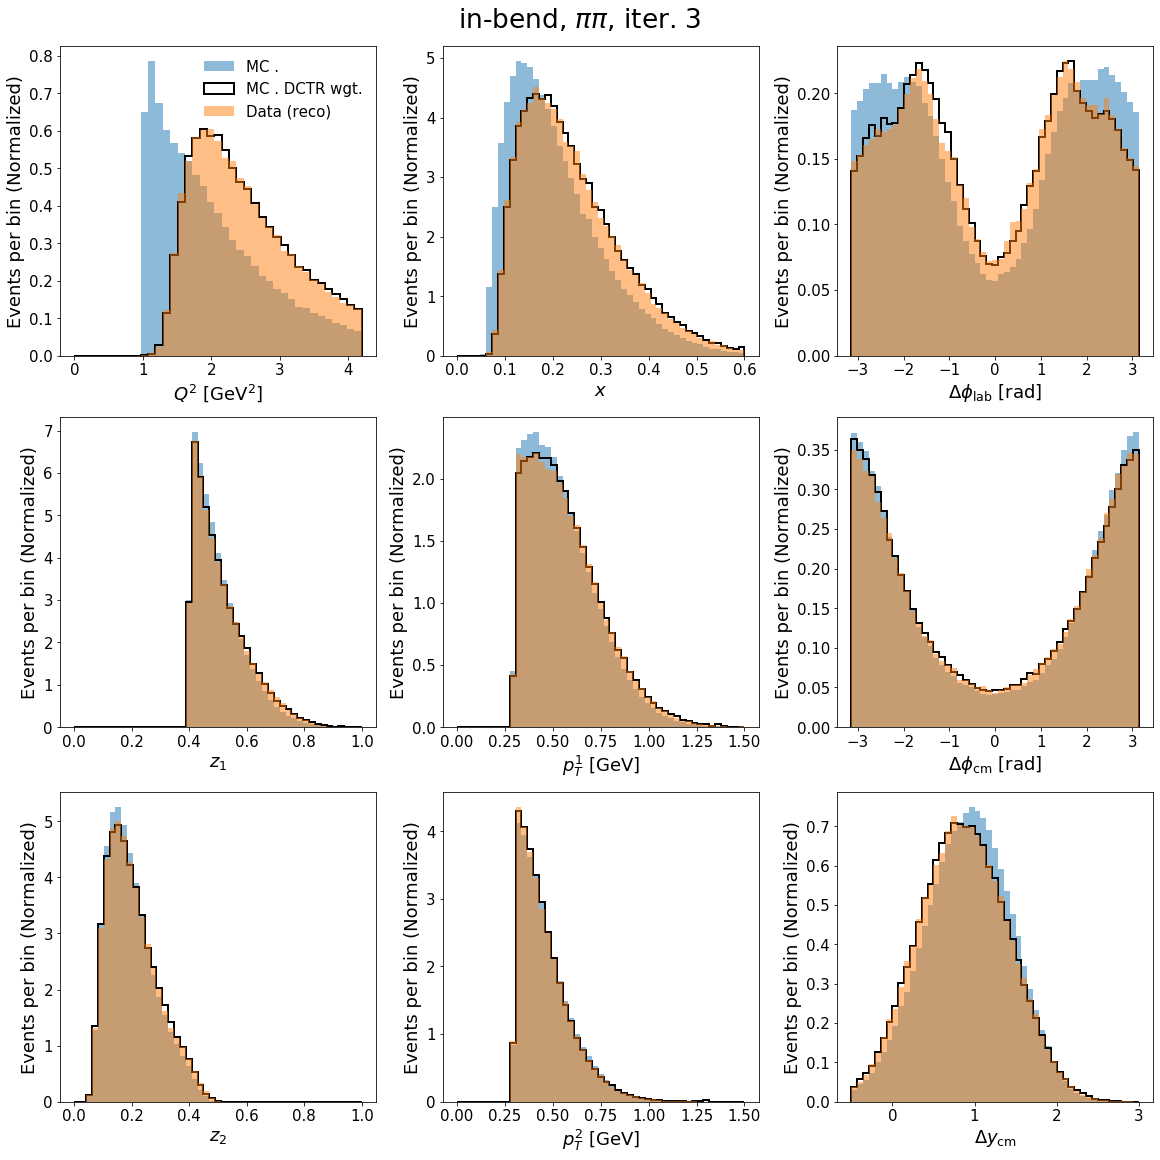

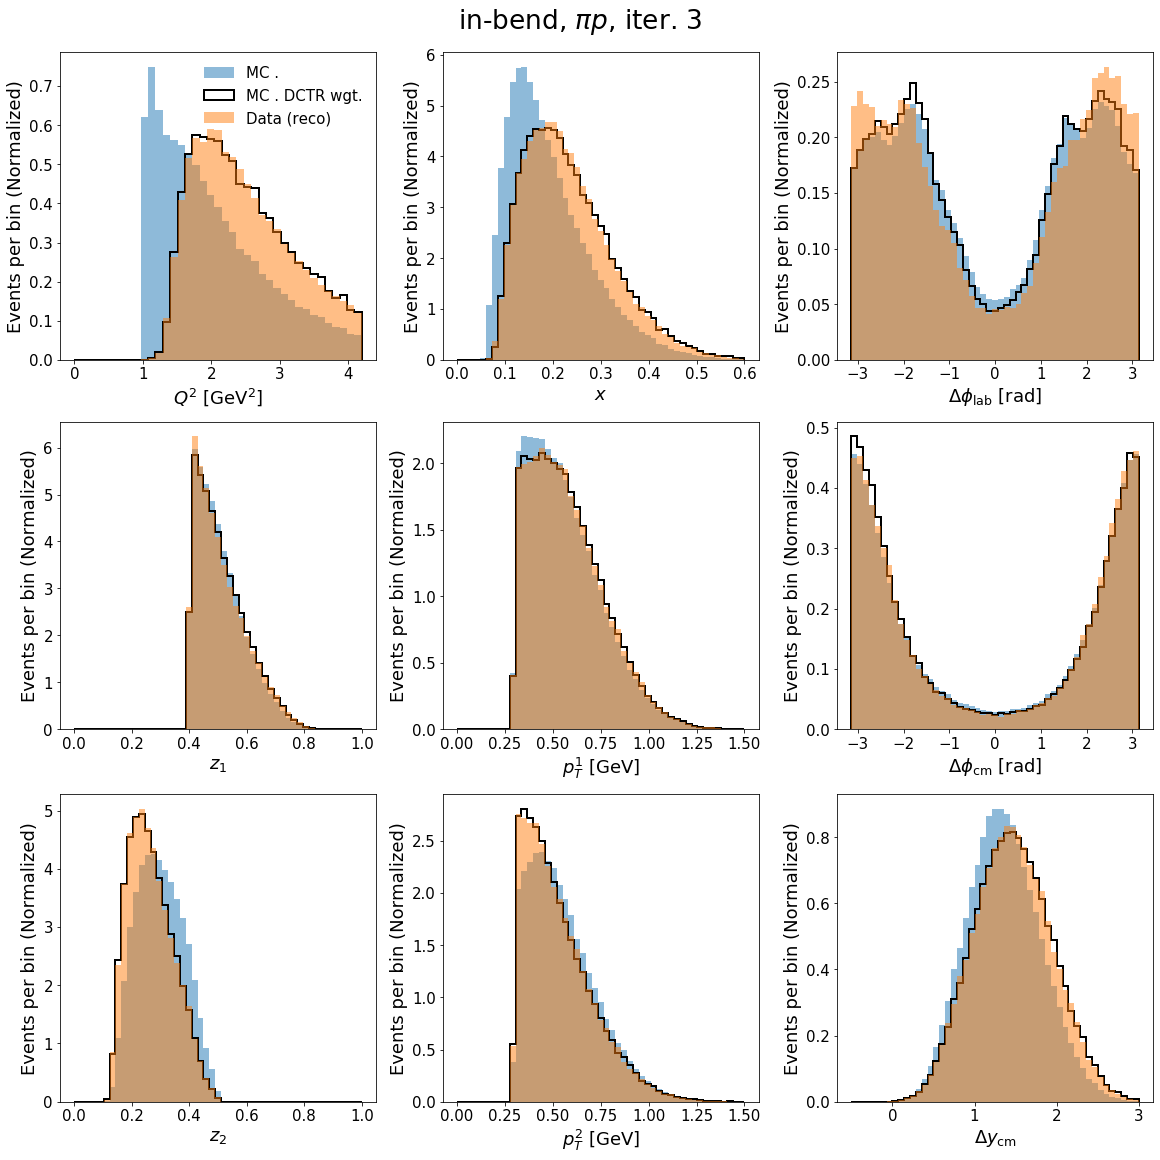

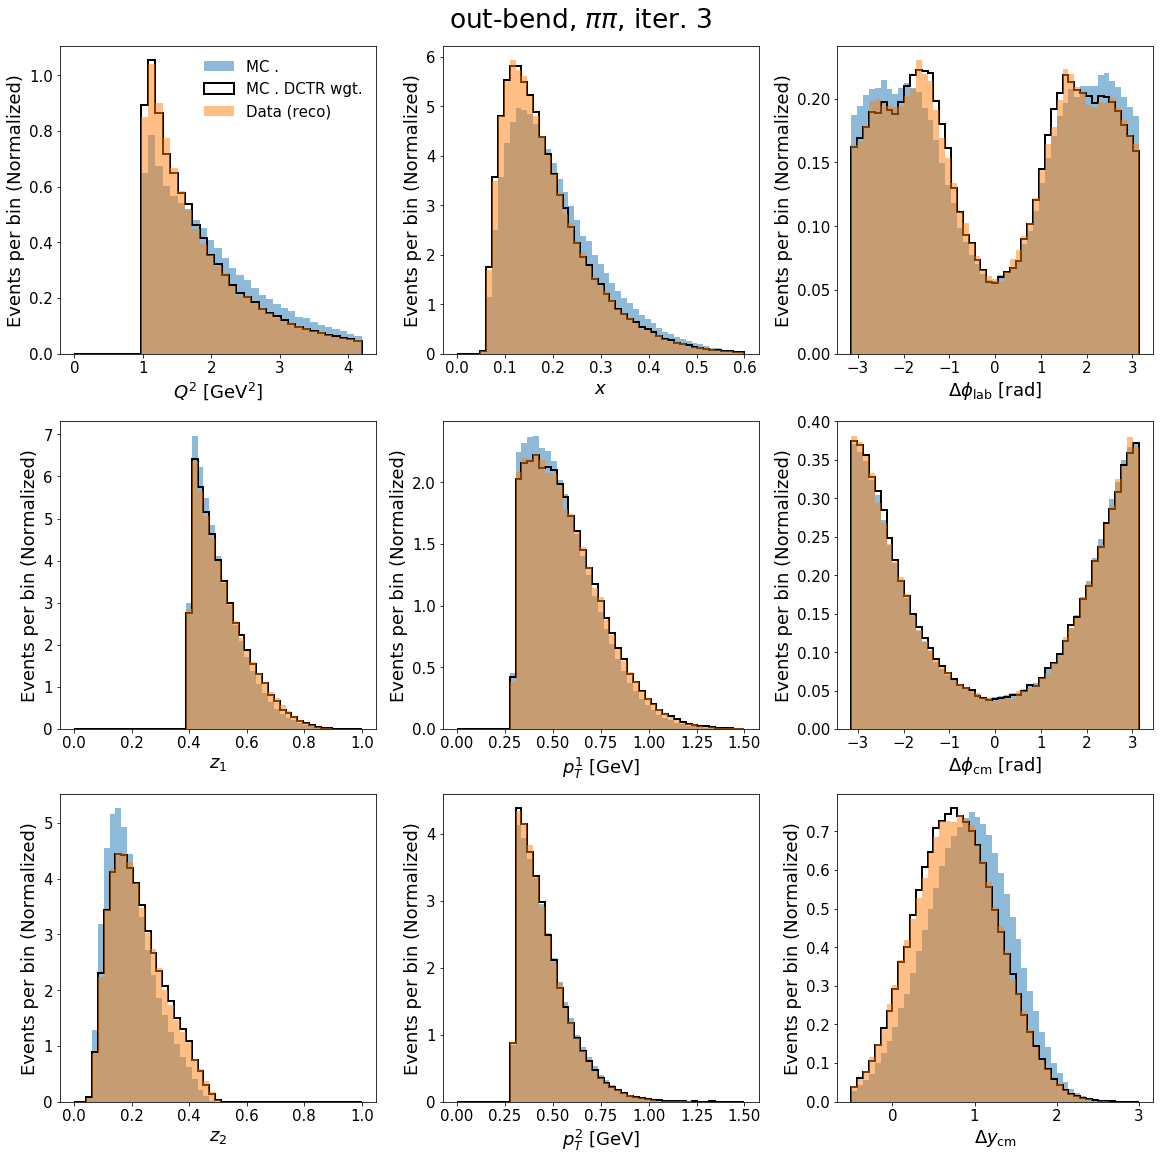

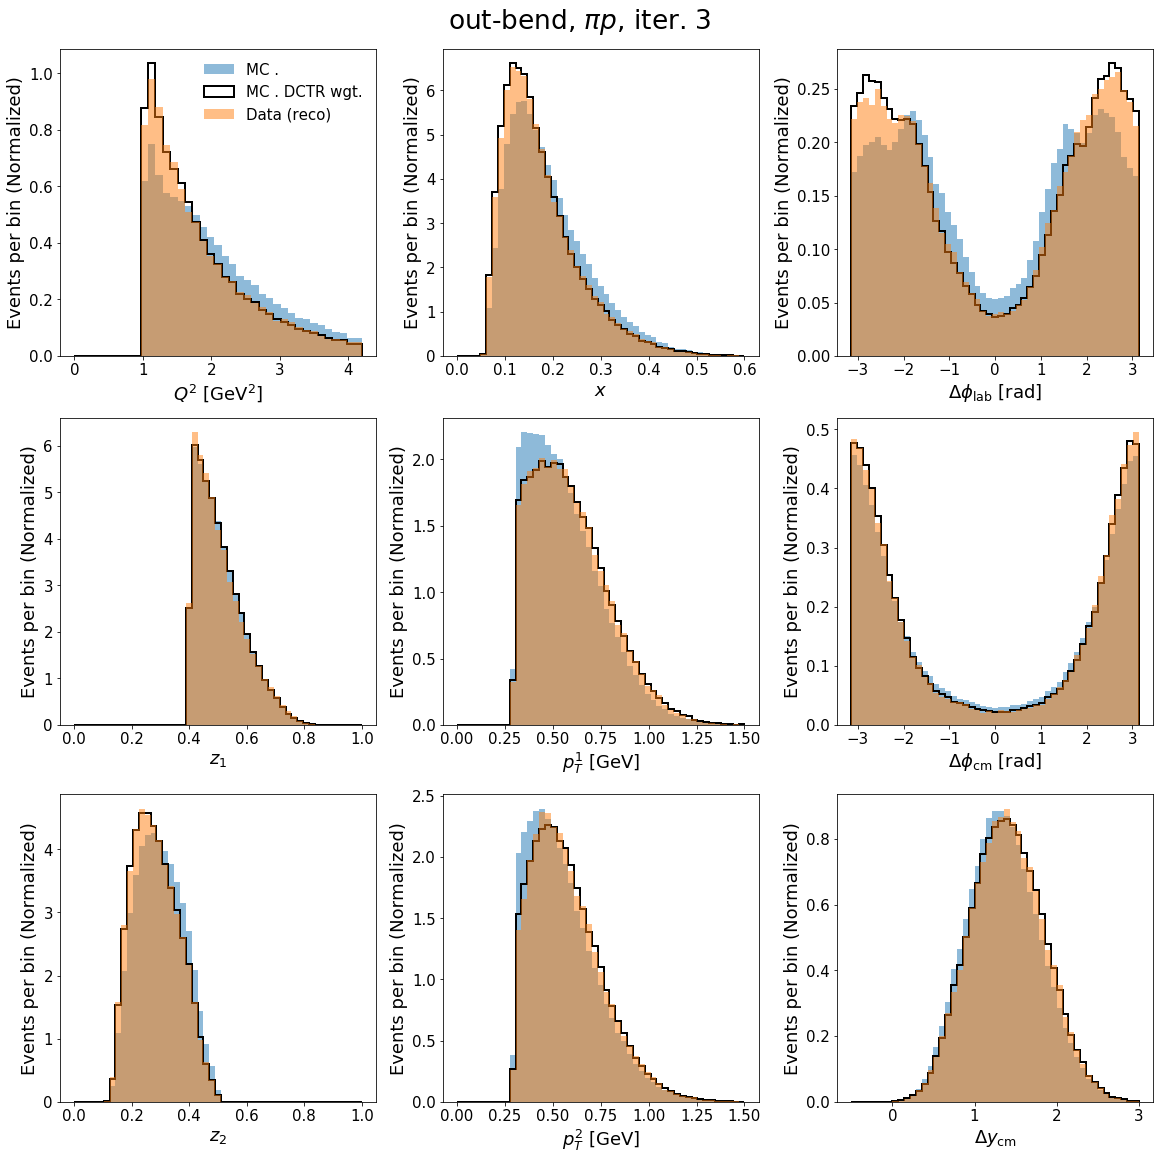

In [40]:
reweight_summary_plots('in_2pi')
reweight_summary_plots('in_pi_p')
reweight_summary_plots('out_2pi')
reweight_summary_plots('out_pi_p')

## Put weights obtained with the DNN back into the mc dataframe:

In [41]:
for key in weights.keys():
    dfs_mc[key]['weight_reco'] = weights[key][-1, 0, :]
    dfs_mc[key]['weight_truth'] = weights[key][-1, 1, :]
    dfs_mc[key].to_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_rga_{key}.root","dihadrons")

<ipython-input-41-85105fdac9b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_mc[key]['weight_reco'] = weights[key][-1, 0, :]
<ipython-input-41-85105fdac9b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_mc[key]['weight_truth'] = weights[key][-1, 1, :]


# slice plots

In [42]:
def slice_plot(key, xvar,xlabel, bins, slicevar, slicelabel, partitions,suptitle=None, sliceUnit=None):
    df_mc =dfs_mc[key]
    df_data =dfs_data[key]
    fig, axs = plt.subplots(1, len(partitions)-1, 
                            figsize=(4*(len(partitions)-1), 4),sharex='all')
    fig.subplots_adjust(wspace=0)
    if suptitle is not None:
        fig.suptitle(suptitle, y=1.15)
    
    axs[0].set_ylabel('Events per bin (Normalized)')
    for i in range(len(partitions)-1):
        query = f'{slicevar}>{partitions[i]} and {slicevar}<{partitions[i+1]}'
        axs[i].set_xlabel(xlabel)
        title = f'{partitions[i]} <{slicelabel}<{partitions[i+1]}'
        if sliceUnit !=None:
            title += f'[{sliceUnit}]'
        axs[i].set_title(title,fontsize='medium')                 
        mc = df_mc.query(query).query("pass_reco != 0")
        axs[i].hist(mc.eval(xvar), bins=bins, label=r'MC .', **plot_style_2)
        #print(len(weights), len(weights[i,0,:]), len(pass_reco),len(df_data))

        axs[i].hist(mc.eval(xvar),
                   bins=bins,
                   weights=mc.weight_reco,
                   label=r'MC . DCTR wgt.',
                   **plot_style_1)

        axs[i].hist(df_data.query(query).eval(xvar),
                   bins=bins,
                   label=r'Data (reco)',
                   **plot_style_2)
        if i==0:
            axs[i].legend(frameon=False,loc='best')
    plt.savefig(f"../images/reweight_eg2_slices_{slicevar}_vs_{xvar}_{key}.png",bbox_inches='tight')
        


<ipython-input-42-9a40371501de>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, len(partitions)-1,


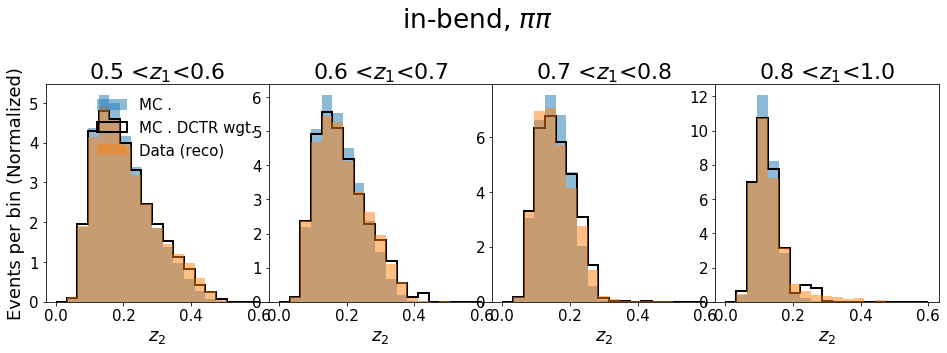

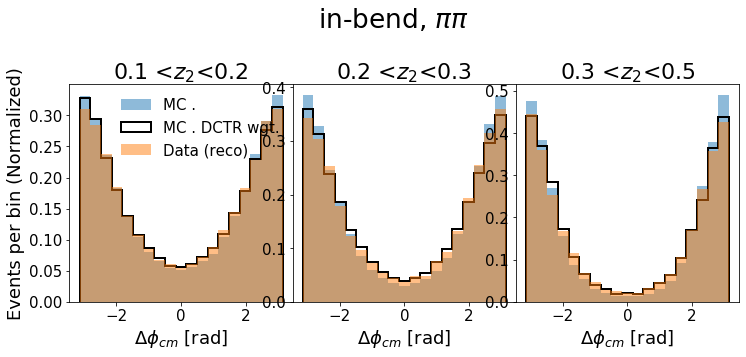

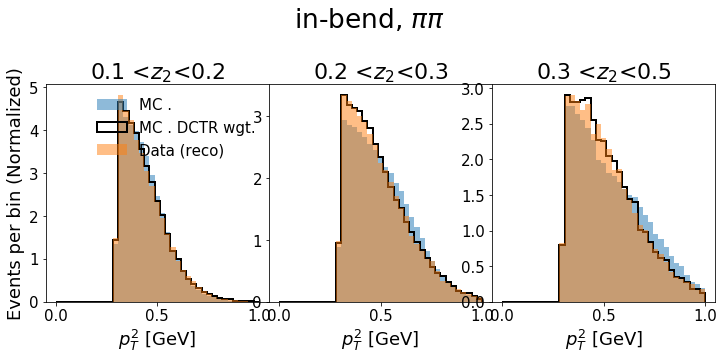

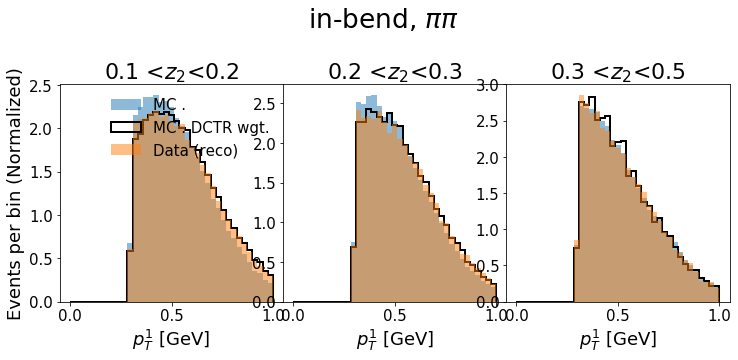

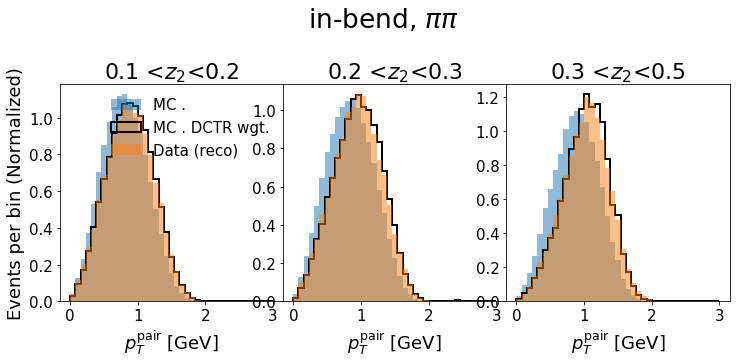

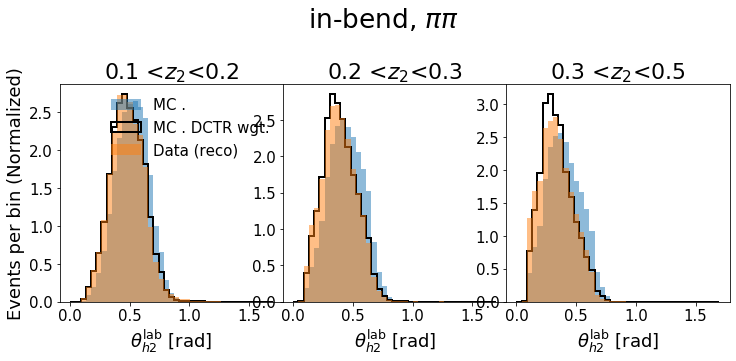

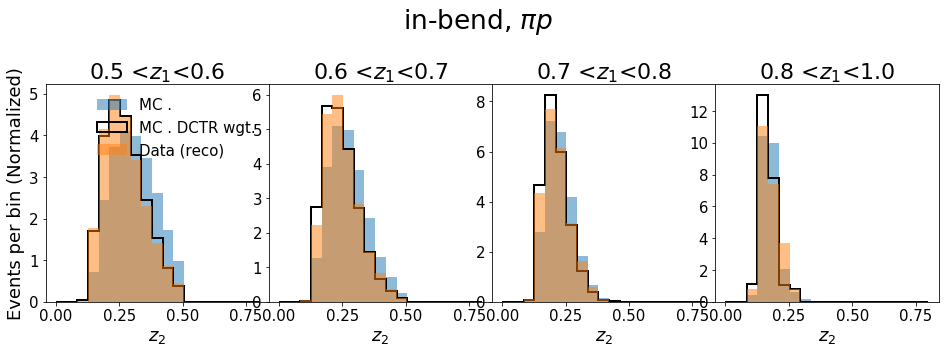

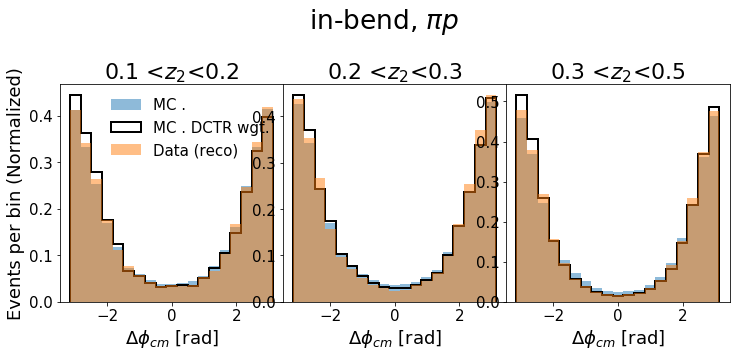

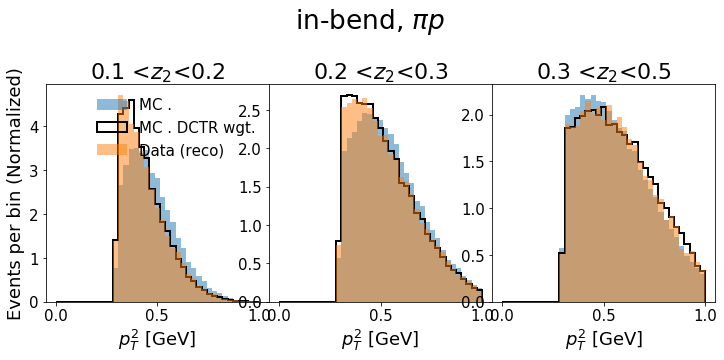

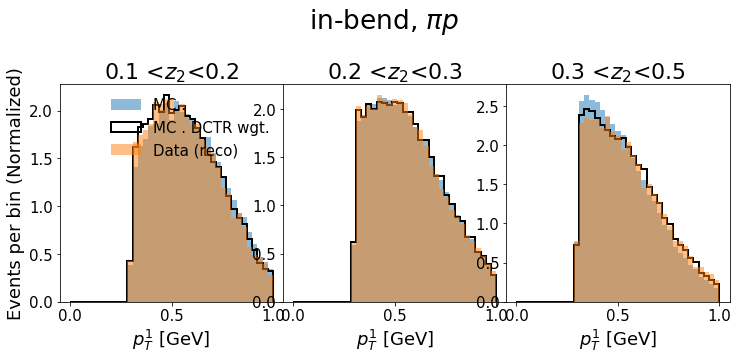

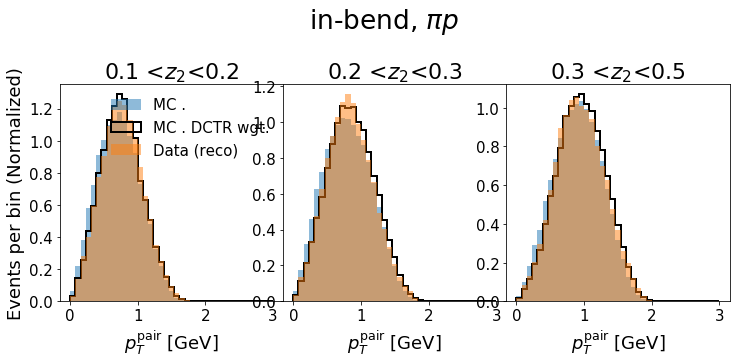

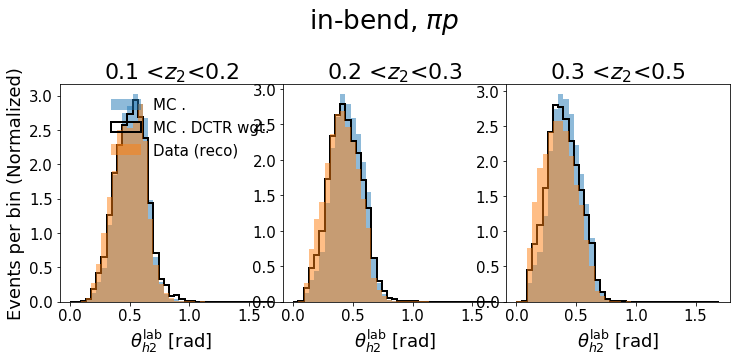

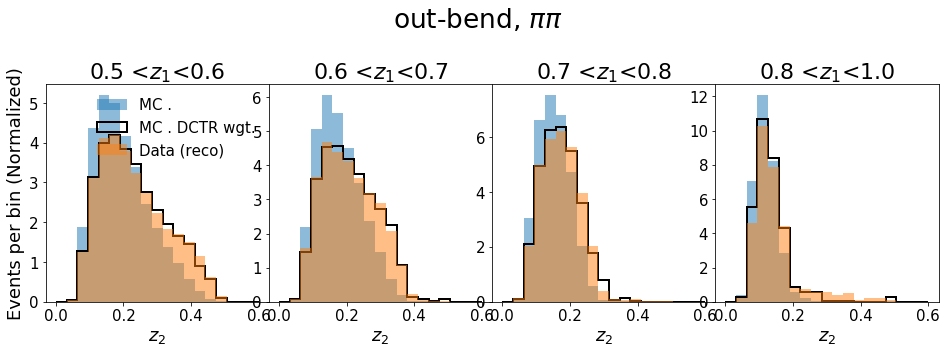

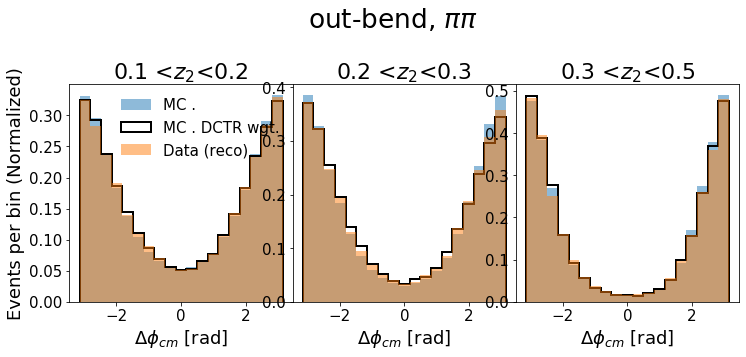

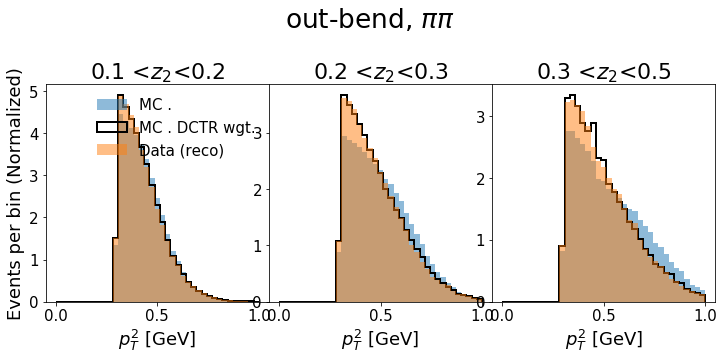

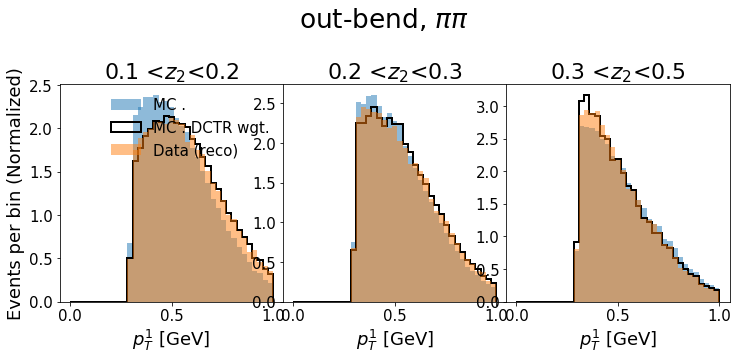

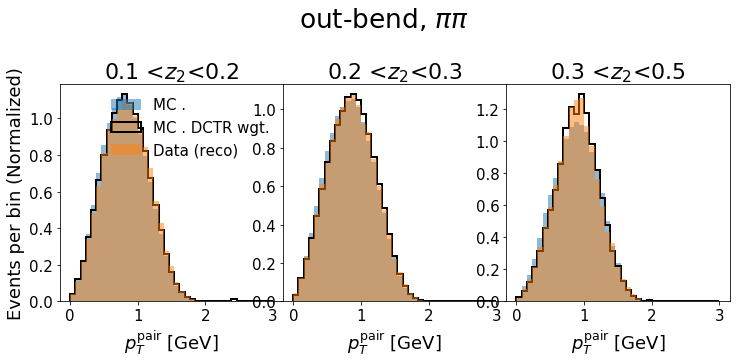

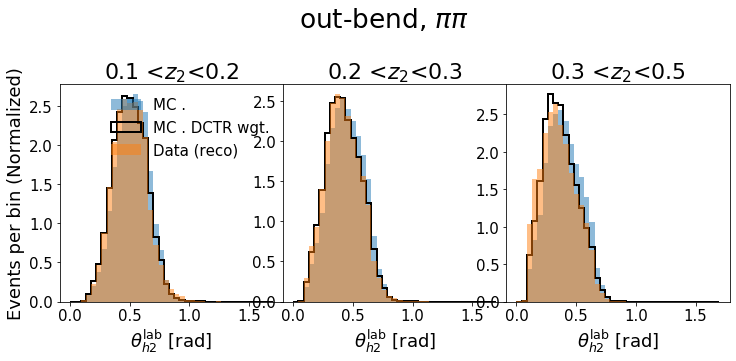

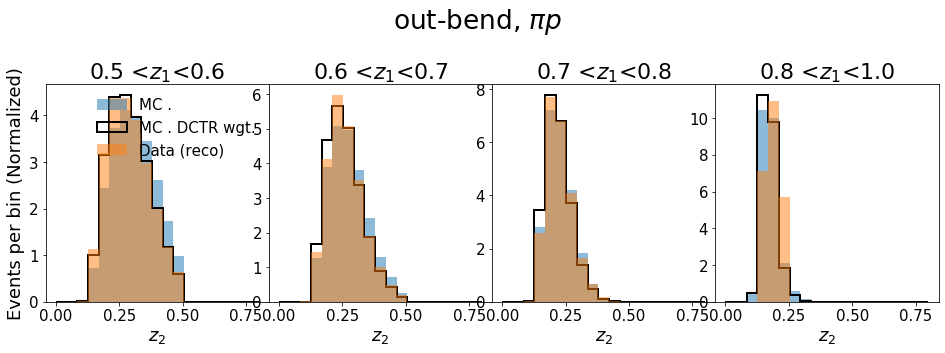

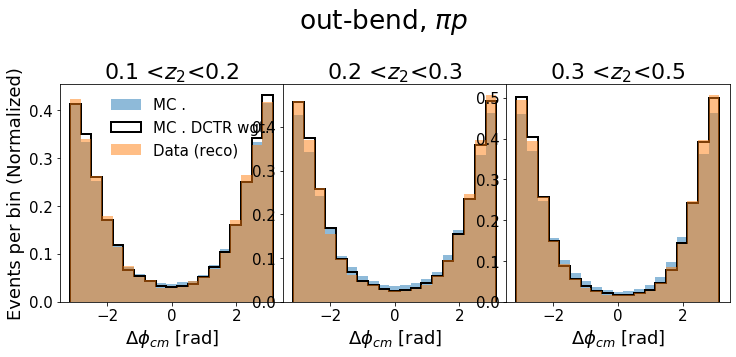

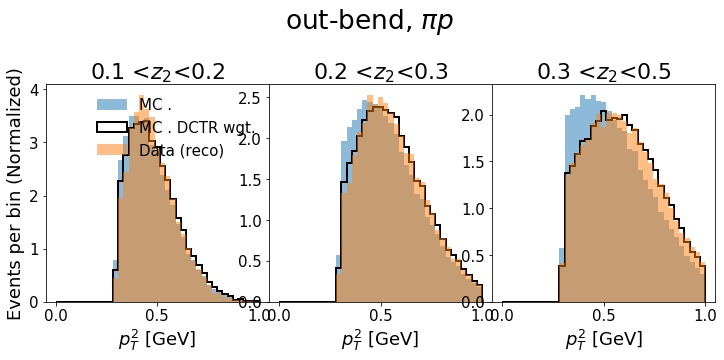

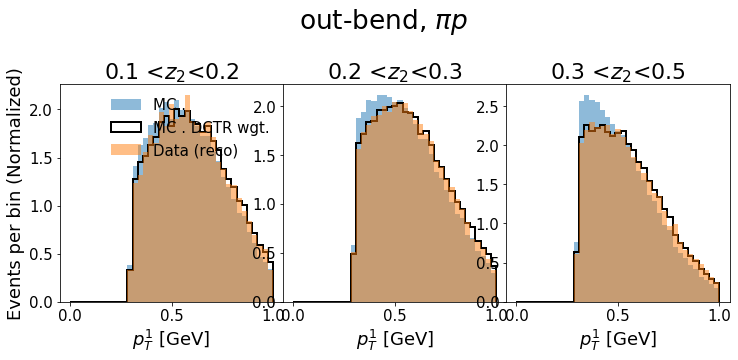

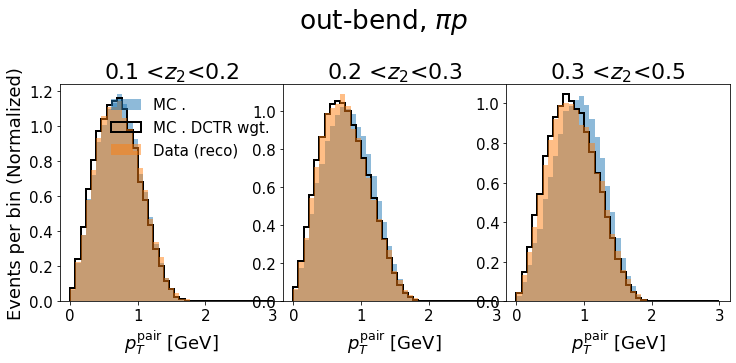

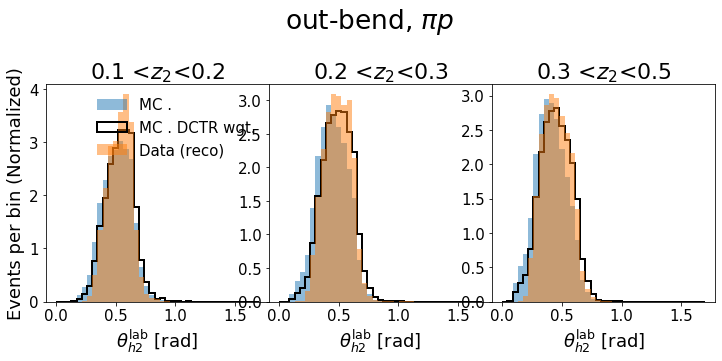

In [44]:

for key in dfs_data.keys():
    #determine the suptitle to use
    suptitle = suptitles[key]
    
    #z1 slices, z2 bins
    slice_plot(key, 'h2_z', '$z_2$', np.linspace(0,.6 if '2pi' in key else .8, 20), 
               'h1_z', '$z_1$', (0.5, 0.6, 0.7, 0.8,1.0), suptitle=suptitle)
    #slice_plot(key, 'diff_phi_cm', r'$\Delta\phi_{cm}$ [rad]', np.linspace(-np.pi,np.pi, 20), 
    #       'diff_rap_cm', r'$\Delta y_{cm}$', (-0.5, 1.0, 2.0, 3.0), suptitle=suptitle)
    
    #z2 slices, diff_phi_cm
    slice_plot(key, 'diff_phi_cm', r'$\Delta\phi_{cm}$ [rad]', np.linspace(-np.pi,np.pi, 20), 
           'h2_z', r'$z_2$', (0.1, 0.2, 0.3, 0.5), suptitle=suptitle)
    #slice_plot(key, 'x', r'$x$', np.linspace(0.1, 0.6, 40), 
    #       'Q2', r'$Q^2$', (1.0, 2.0, 3.0, 4.0), suptitle=suptitle,sliceUnit='GeV$^2$')
    #slice_plot(key, 'h1_cm_pt', r'$p^1_T$', np.linspace(0, 1, 40), 
    #       'h2_cm_pt', r'$p^2_T$', (0, 0.3, 0.6, 0.9), suptitle=suptitle,sliceUnit='GeV')
    
    slice_plot(key, 'h2_cm_pt', r'$p^2_T$ [GeV]', np.linspace(0, 1, 40), 
           'h2_z', r'$z_2$', (0.1, 0.2, 0.3, 0.5), suptitle=suptitle,sliceUnit=None)
    slice_plot(key, 'h1_cm_pt', r'$p^1_T$ [GeV]', np.linspace(0, 1, 40), 
           'h2_z', r'$z_2$', (0.1, 0.2, 0.3, 0.5), suptitle=suptitle,sliceUnit=None)
    
    slice_plot(key, 'pair_pt', r'$p^{\mathrm{pair}}_T$ [GeV]', np.linspace(0, 3, 40), 
           'h2_z', r'$z_2$', (0.1, 0.2, 0.3, 0.5), suptitle=suptitle,sliceUnit=None)
    
    slice_plot(key, 'h2_th', r'$\theta^{\mathrm{lab}}_{h2}$ [rad]', np.linspace(0, 1.7, 40), 
           'h2_z', r'$z_2$', (0.1, 0.2, 0.3, 0.5), suptitle=suptitle,sliceUnit=None)

In [174]:
print(dfs_data['C_2pi'].columns)

Index(['dphi', 'dphi_lab', 'diff_rap_cm', 'h1_z', 'h2_z', 'h1_cm_pt',
       'h2_cm_pt', 'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid',
       'h2_pid', 'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass',
       'pair_pt', 'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'x',
       'u', 'h1_ph', 'h1_th', 'h2_ph', 'h2_th', '__index__', 'inelasticity',
       'diff_phi_cm', 'pi', 'h1_e', 'h2_e', 'h2_mass', 'h1_p', 'h2_p', 'z_tot',
       'pair_pt2', 'pass_reco', 'pass_truth', 'diff_phi_lab'],
      dtype='object')
